# 18_4 Практическая работа

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_excel('drive/MyDrive/Colab Notebooks/Junior/input_data.xlsx')
df.head()

,Unnamed: 0,contract_num,product_name,client_id,contract_status,currency_name,duration,country,age,sex,price,insurance_amount,loss_payout_amt,price_usd,insurance_amount_usd,loss_payout_amt_usd
0,0,ТТЕ7227715*****,Страхование путешественников,10161870404,Действует,Российский рубль,10,Беларусь,20,M,1096,2000000,NaN,12.41768,22660.000080,NaN
1,1,ТТЕ7227715*****,Страхование путешественников,1017159879,Действует,Российский рубль,7,Индонезия,55,M,1918,5000000,NaN,21.73094,56650.000199,NaN
2,2,БАДАМСТЕ55*****,Страхование путешественников,10161883357,Действует,Российский рубль,10,Беларусь,61,F,1096,2000000,NaN,12.41768,22660.000080,NaN
3,3,ТТЕ7227715*****,Страхование путешественников,100766461,Действует,Российский рубль,14,Грузия,25,M,1534,2000000,NaN,17.38022,22660.000080,NaN
4,4,ТТЕ7227715*****,Страхование путешественников,10171604758,Действует,Российский рубль,7,Аргентина,33,M,1918,5000000,NaN,21.73094,56650.000199,NaN


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.isna().sum()

Unnamed: 0                 0
contract_num               0
product_name               0
client_id                  0
contract_status            0
currency_name              0
duration                   0
country                    0
age                        0
sex                        0
price                      0
insurance_amount           0
loss_payout_amt         3666
price_usd                120
insurance_amount_usd     120
loss_payout_amt_usd     3668
dtype: int64

In [ ]:
# Курс доллара
exchange_rat = (df.insurance_amount.iloc[0]) / (df.insurance_amount_usd.iloc[0])
exchange_rat

88.261253

In [ ]:

# Применение лямбда-функции для заполнения пропусков в колонке price_usd
df['price_usd'] = df.apply(lambda row: row['price'] if row['currency_name'] == 'Доллар США'  else row['price'] / exchange_rat, axis=1)
df

,Unnamed: 0,contract_num,product_name,client_id,contract_status,currency_name,duration,country,age,sex,price,insurance_amount,loss_payout_amt,price_usd,insurance_amount_usd,loss_payout_amt_usd
0,0,ТТЕ7227715*****,Страхование путешественников,10161870404,Действует,Российский рубль,10,Беларусь,20,M,1096,2000000,NaN,12.41768,22660.000080,NaN
1,1,ТТЕ7227715*****,Страхование путешественников,1017159879,Действует,Российский рубль,7,Индонезия,55,M,1918,5000000,NaN,21.73094,56650.000199,NaN
2,2,БАДАМСТЕ55*****,Страхование путешественников,10161883357,Действует,Российский рубль,10,Беларусь,61,F,1096,2000000,NaN,12.41768,22660.000080,NaN
3,3,ТТЕ7227715*****,Страхование путешественников,100766461,Действует,Российский рубль,14,Грузия,25,M,1534,2000000,NaN,17.38022,22660.000080,NaN
4,4,ТТЕ7227715*****,Страхование путешественников,10171604758,Действует,Российский рубль,7,Аргентина,33,M,1918,5000000,NaN,21.73094,56650.000199,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3706,3706,ДСЖ-5/1539*****,Страхование путешественников,100649013,Действует,Российский рубль,15,Турция,22,F,2466,3000000,NaN,27.93978,33990.000119,NaN
3707,3707,ТТЕ7227778*****,Страхование путешественников,1017151314,Действует,Российский рубль,7,Индонезия,33,M,1918,5000000,NaN,21.73094,56650.000199,NaN
3708,3708,БТАСЕ275 -*****,Страхование путешественников,1006491844,Действует,Российский рубль,15,Турция,43,M,2466,3000000,NaN,27.93978,33990.000119,NaN
3709,3709,ТТЕ7227778*****,Страхование путешественников,1006513037,Действует,Российский рубль,30,Турция,29,M,4932,3000000,NaN,55.87956,33990.000119,NaN


In [ ]:
# Применение лямбда-функции для заполнения пропусков в колонке insurance_amount_usd
df['insurance_amount_usd'] = df.apply(lambda row: row['insurance_amount'] if row['currency_name'] == 'Доллар США'  else row['insurance_amount'] / exchange_rat, axis=1)
df

,Unnamed: 0,contract_num,product_name,client_id,contract_status,currency_name,duration,country,age,sex,price,insurance_amount,loss_payout_amt,price_usd,insurance_amount_usd,loss_payout_amt_usd
0,0,ТТЕ7227715*****,Страхование путешественников,10161870404,Действует,Российский рубль,10,Беларусь,20,M,1096,2000000,NaN,12.41768,22660.000080,NaN
1,1,ТТЕ7227715*****,Страхование путешественников,1017159879,Действует,Российский рубль,7,Индонезия,55,M,1918,5000000,NaN,21.73094,56650.000199,NaN
2,2,БАДАМСТЕ55*****,Страхование путешественников,10161883357,Действует,Российский рубль,10,Беларусь,61,F,1096,2000000,NaN,12.41768,22660.000080,NaN
3,3,ТТЕ7227715*****,Страхование путешественников,100766461,Действует,Российский рубль,14,Грузия,25,M,1534,2000000,NaN,17.38022,22660.000080,NaN
4,4,ТТЕ7227715*****,Страхование путешественников,10171604758,Действует,Российский рубль,7,Аргентина,33,M,1918,5000000,NaN,21.73094,56650.000199,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3706,3706,ДСЖ-5/1539*****,Страхование путешественников,100649013,Действует,Российский рубль,15,Турция,22,F,2466,3000000,NaN,27.93978,33990.000119,NaN
3707,3707,ТТЕ7227778*****,Страхование путешественников,1017151314,Действует,Российский рубль,7,Индонезия,33,M,1918,5000000,NaN,21.73094,56650.000199,NaN
3708,3708,БТАСЕ275 -*****,Страхование путешественников,1006491844,Действует,Российский рубль,15,Турция,43,M,2466,3000000,NaN,27.93978,33990.000119,NaN
3709,3709,ТТЕ7227778*****,Страхование путешественников,1006513037,Действует,Российский рубль,30,Турция,29,M,4932,3000000,NaN,55.87956,33990.000119,NaN


In [ ]:
# Заполнение пропусков в колонке loss_payout_amt
df['loss_payout_amt'] = df['loss_payout_amt'].fillna(0)
df

,Unnamed: 0,contract_num,product_name,client_id,contract_status,currency_name,duration,country,age,sex,price,insurance_amount,loss_payout_amt,price_usd,insurance_amount_usd,loss_payout_amt_usd
0,0,ТТЕ7227715*****,Страхование путешественников,10161870404,Действует,Российский рубль,10,Беларусь,20,M,1096,2000000,0.0,12.41768,22660.000080,NaN
1,1,ТТЕ7227715*****,Страхование путешественников,1017159879,Действует,Российский рубль,7,Индонезия,55,M,1918,5000000,0.0,21.73094,56650.000199,NaN
2,2,БАДАМСТЕ55*****,Страхование путешественников,10161883357,Действует,Российский рубль,10,Беларусь,61,F,1096,2000000,0.0,12.41768,22660.000080,NaN
3,3,ТТЕ7227715*****,Страхование путешественников,100766461,Действует,Российский рубль,14,Грузия,25,M,1534,2000000,0.0,17.38022,22660.000080,NaN
4,4,ТТЕ7227715*****,Страхование путешественников,10171604758,Действует,Российский рубль,7,Аргентина,33,M,1918,5000000,0.0,21.73094,56650.000199,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3706,3706,ДСЖ-5/1539*****,Страхование путешественников,100649013,Действует,Российский рубль,15,Турция,22,F,2466,3000000,0.0,27.93978,33990.000119,NaN
3707,3707,ТТЕ7227778*****,Страхование путешественников,1017151314,Действует,Российский рубль,7,Индонезия,33,M,1918,5000000,0.0,21.73094,56650.000199,NaN
3708,3708,БТАСЕ275 -*****,Страхование путешественников,1006491844,Действует,Российский рубль,15,Турция,43,M,2466,3000000,0.0,27.93978,33990.000119,NaN
3709,3709,ТТЕ7227778*****,Страхование путешественников,1006513037,Действует,Российский рубль,30,Турция,29,M,4932,3000000,0.0,55.87956,33990.000119,NaN


In [ ]:
# Применение лямбда-функции для заполнения пропусков в колонке loss_payout_amt_usd
df['loss_payout_amt_usd'] = df.apply(lambda row: row['loss_payout_amt'] if row['currency_name'] == 'Доллар США'  else row['loss_payout_amt'] / exchange_rat, axis=1)
df

,Unnamed: 0,contract_num,product_name,client_id,contract_status,currency_name,duration,country,age,sex,price,insurance_amount,loss_payout_amt,price_usd,insurance_amount_usd,loss_payout_amt_usd
0,0,ТТЕ7227715*****,Страхование путешественников,10161870404,Действует,Российский рубль,10,Беларусь,20,M,1096,2000000,0.0,12.41768,22660.000080,0.0
1,1,ТТЕ7227715*****,Страхование путешественников,1017159879,Действует,Российский рубль,7,Индонезия,55,M,1918,5000000,0.0,21.73094,56650.000199,0.0
2,2,БАДАМСТЕ55*****,Страхование путешественников,10161883357,Действует,Российский рубль,10,Беларусь,61,F,1096,2000000,0.0,12.41768,22660.000080,0.0
3,3,ТТЕ7227715*****,Страхование путешественников,100766461,Действует,Российский рубль,14,Грузия,25,M,1534,2000000,0.0,17.38022,22660.000080,0.0
4,4,ТТЕ7227715*****,Страхование путешественников,10171604758,Действует,Российский рубль,7,Аргентина,33,M,1918,5000000,0.0,21.73094,56650.000199,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3706,3706,ДСЖ-5/1539*****,Страхование путешественников,100649013,Действует,Российский рубль,15,Турция,22,F,2466,3000000,0.0,27.93978,33990.000119,0.0
3707,3707,ТТЕ7227778*****,Страхование путешественников,1017151314,Действует,Российский рубль,7,Индонезия,33,M,1918,5000000,0.0,21.73094,56650.000199,0.0
3708,3708,БТАСЕ275 -*****,Страхование путешественников,1006491844,Действует,Российский рубль,15,Турция,43,M,2466,3000000,0.0,27.93978,33990.000119,0.0
3709,3709,ТТЕ7227778*****,Страхование путешественников,1006513037,Действует,Российский рубль,30,Турция,29,M,4932,3000000,0.0,55.87956,33990.000119,0.0


In [ ]:
df.isna().sum()

Unnamed: 0              0
contract_num            0
product_name            0
client_id               0
contract_status         0
currency_name           0
duration                0
country                 0
age                     0
sex                     0
price                   0
insurance_amount        0
loss_payout_amt         0
price_usd               0
insurance_amount_usd    0
loss_payout_amt_usd     0
dtype: int64

In [ ]:
df.quantile(0.997)

Unnamed: 0              3.698870e+03
client_id               1.046576e+10
duration                3.650000e+02
age                     8.474000e+01
price                   6.000000e+04
insurance_amount        5.000000e+06
loss_payout_amt         1.500000e+05
price_usd               6.798000e+02
insurance_amount_usd    1.000000e+05
loss_payout_amt_usd     2.266000e+03
Name: 0.997, dtype: float64

In [ ]:
df.quantile(0.97)

Unnamed: 0              3.598700e+03
client_id               1.017785e+10
duration                3.000000e+01
age                     6.500000e+01
price                   7.945000e+03
insurance_amount        5.000000e+06
loss_payout_amt         0.000000e+00
price_usd               1.640000e+02
insurance_amount_usd    5.665000e+04
loss_payout_amt_usd     0.000000e+00
Name: 0.97, dtype: float64

In [ ]:
df.quantile(0.68)

Unnamed: 0              2.522800e+03
client_id               1.009110e+10
duration                1.400000e+01
age                     4.400000e+01
price                   3.836000e+03
insurance_amount        5.000000e+06
loss_payout_amt         0.000000e+00
price_usd               4.346188e+01
insurance_amount_usd    5.665000e+04
loss_payout_amt_usd     0.000000e+00
Name: 0.68, dtype: float64

<Axes: xlabel='age'>

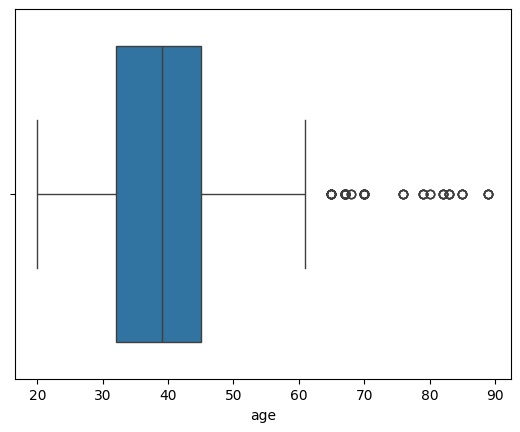

In [ ]:

sns.boxplot(data=df, x='age')

<Axes: xlabel='price_usd'>

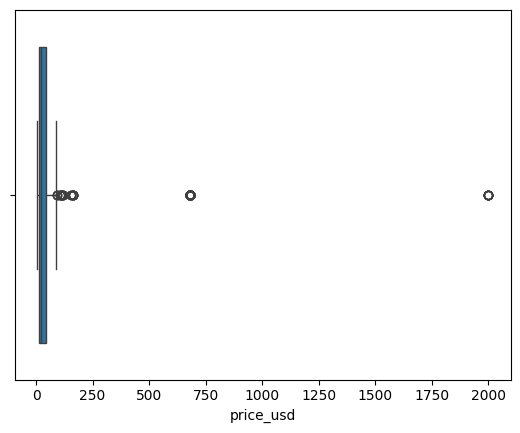

In [ ]:
sns.boxplot(data=df, x='price_usd')

<Axes: xlabel='price'>

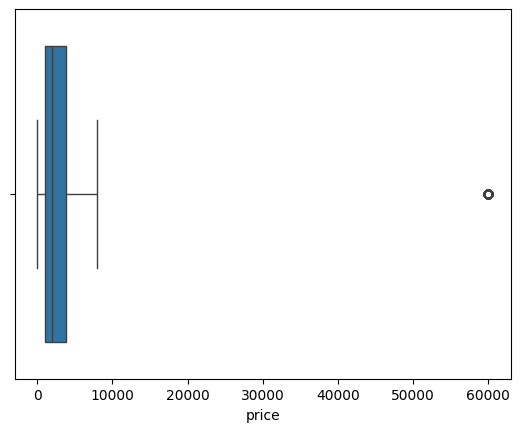

In [ ]:
sns.boxplot(data=df, x='price')

<Axes: xlabel='loss_payout_amt'>

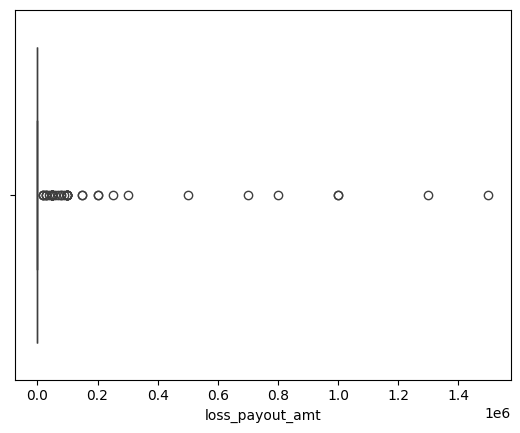

In [ ]:
sns.boxplot(data=df, x='loss_payout_amt')

In [ ]:
del df['contract_num']
df

,Unnamed: 0,product_name,client_id,contract_status,currency_name,duration,country,age,sex,price,insurance_amount,loss_payout_amt,price_usd,insurance_amount_usd,loss_payout_amt_usd
0,0,Страхование путешественников,10161870404,Действует,Российский рубль,10,Беларусь,20,M,1096,2000000,0.0,12.41768,22660.000080,0.0
1,1,Страхование путешественников,1017159879,Действует,Российский рубль,7,Индонезия,55,M,1918,5000000,0.0,21.73094,56650.000199,0.0
2,2,Страхование путешественников,10161883357,Действует,Российский рубль,10,Беларусь,61,F,1096,2000000,0.0,12.41768,22660.000080,0.0
3,3,Страхование путешественников,100766461,Действует,Российский рубль,14,Грузия,25,M,1534,2000000,0.0,17.38022,22660.000080,0.0
4,4,Страхование путешественников,10171604758,Действует,Российский рубль,7,Аргентина,33,M,1918,5000000,0.0,21.73094,56650.000199,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3706,3706,Страхование путешественников,100649013,Действует,Российский рубль,15,Турция,22,F,2466,3000000,0.0,27.93978,33990.000119,0.0
3707,3707,Страхование путешественников,1017151314,Действует,Российский рубль,7,Индонезия,33,M,1918,5000000,0.0,21.73094,56650.000199,0.0
3708,3708,Страхование путешественников,1006491844,Действует,Российский рубль,15,Турция,43,M,2466,3000000,0.0,27.93978,33990.000119,0.0
3709,3709,Страхование путешественников,1006513037,Действует,Российский рубль,30,Турция,29,M,4932,3000000,0.0,55.87956,33990.000119,0.0


In [ ]:
del df['Unnamed: 0']
df

,product_name,client_id,contract_status,currency_name,duration,country,age,sex,price,insurance_amount,loss_payout_amt,price_usd,insurance_amount_usd,loss_payout_amt_usd
0,Страхование путешественников,10161870404,Действует,Российский рубль,10,Беларусь,20,M,1096,2000000,0.0,12.41768,22660.000080,0.0
1,Страхование путешественников,1017159879,Действует,Российский рубль,7,Индонезия,55,M,1918,5000000,0.0,21.73094,56650.000199,0.0
2,Страхование путешественников,10161883357,Действует,Российский рубль,10,Беларусь,61,F,1096,2000000,0.0,12.41768,22660.000080,0.0
3,Страхование путешественников,100766461,Действует,Российский рубль,14,Грузия,25,M,1534,2000000,0.0,17.38022,22660.000080,0.0
4,Страхование путешественников,10171604758,Действует,Российский рубль,7,Аргентина,33,M,1918,5000000,0.0,21.73094,56650.000199,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3706,Страхование путешественников,100649013,Действует,Российский рубль,15,Турция,22,F,2466,3000000,0.0,27.93978,33990.000119,0.0
3707,Страхование путешественников,1017151314,Действует,Российский рубль,7,Индонезия,33,M,1918,5000000,0.0,21.73094,56650.000199,0.0
3708,Страхование путешественников,1006491844,Действует,Российский рубль,15,Турция,43,M,2466,3000000,0.0,27.93978,33990.000119,0.0
3709,Страхование путешественников,1006513037,Действует,Российский рубль,30,Турция,29,M,4932,3000000,0.0,55.87956,33990.000119,0.0


In [ ]:
df.country.unique()

array(['Беларусь', 'Индонезия', 'Грузия', 'Аргентина', 'Турция',
       'Узбекистан', 'США', 'Армения', 'Азербайджан', 'Египет',
       'Великобритания', 'Канада', 'Болгария', 'Казахстан', 'Германия',
       'Франция', 'Сирия', 'Иран', 'ОАЭ', 'Таиланд'], dtype=object)

In [ ]:
df.sex.unique()

array(['M', 'F'], dtype=object)

In [ ]:
df.product_name.unique()

array(['Страхование путешественников', 'Страхование путешественников USD'],
      dtype=object)

In [ ]:
df.currency_name.unique()

array(['Российский рубль', 'Доллар США'], dtype=object)

In [ ]:
df2 = df[['currency_name', 'sex', 'contract_status', 'product_name']]
df2

,currency_name,sex,contract_status,product_name
0,Российский рубль,M,Действует,Страхование путешественников
1,Российский рубль,M,Действует,Страхование путешественников
2,Российский рубль,F,Действует,Страхование путешественников
3,Российский рубль,M,Действует,Страхование путешественников
4,Российский рубль,M,Действует,Страхование путешественников
...,...,...,...,...
3706,Российский рубль,F,Действует,Страхование путешественников
3707,Российский рубль,M,Действует,Страхование путешественников
3708,Российский рубль,M,Действует,Страхование путешественников
3709,Российский рубль,M,Действует,Страхование путешественников


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3711 entries, 0 to 3710
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_name          3711 non-null   object 
 1   client_id             3711 non-null   int64  
 2   contract_status       3711 non-null   object 
 3   currency_name         3711 non-null   object 
 4   duration              3711 non-null   int64  
 5   country               3711 non-null   object 
 6   age                   3711 non-null   int64  
 7   sex                   3711 non-null   object 
 8   price                 3711 non-null   int64  
 9   insurance_amount      3711 non-null   int64  
 10  loss_payout_amt       3711 non-null   float64
 11  price_usd             3711 non-null   float64
 12  insurance_amount_usd  3711 non-null   float64
 13  loss_payout_amt_usd   3711 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 406.0+ KB


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Кодировка категориальных признаков
ohe = OneHotEncoder(sparse=False)
ohe

OneHotEncoder(sparse=False)

In [ ]:
ohe.fit(df2)

C:\Users\user\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(sparse=False, sparse_output=False)

In [ ]:
ohe_df1 = ohe.transform(df2)
ohe_df1

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [ ]:
df[ohe.get_feature_names_out()] = ohe_df1
df.head()

,product_name,client_id,contract_status,currency_name,duration,country,age,sex,price,insurance_amount,...,insurance_amount_usd,loss_payout_amt_usd,currency_name_Доллар США,currency_name_Российский рубль,sex_F,sex_M,contract_status_Действует,contract_status_Завершен,product_name_Страхование путешественников,product_name_Страхование путешественников USD
0,Страхование путешественников,10161870404,Действует,Российский рубль,10,Беларусь,20,M,1096,2000000,...,22660.000080,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,Страхование путешественников,1017159879,Действует,Российский рубль,7,Индонезия,55,M,1918,5000000,...,56650.000199,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
2,Страхование путешественников,10161883357,Действует,Российский рубль,10,Беларусь,61,F,1096,2000000,...,22660.000080,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,Страхование путешественников,100766461,Действует,Российский рубль,14,Грузия,25,M,1534,2000000,...,22660.000080,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,Страхование путешественников,10171604758,Действует,Российский рубль,7,Аргентина,33,M,1918,5000000,...,56650.000199,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


In [ ]:
columns_for_drop = ['currency_name', 'sex', 'contract_status', 'product_name']
df = df.drop(columns=columns_for_drop)
df

,client_id,duration,country,age,price,insurance_amount,loss_payout_amt,price_usd,insurance_amount_usd,loss_payout_amt_usd,currency_name_Доллар США,currency_name_Российский рубль,sex_F,sex_M,contract_status_Действует,contract_status_Завершен,product_name_Страхование путешественников,product_name_Страхование путешественников USD
0,10161870404,10,Беларусь,20,1096,2000000,0.0,12.41768,22660.000080,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,1017159879,7,Индонезия,55,1918,5000000,0.0,21.73094,56650.000199,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
2,10161883357,10,Беларусь,61,1096,2000000,0.0,12.41768,22660.000080,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,100766461,14,Грузия,25,1534,2000000,0.0,17.38022,22660.000080,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,10171604758,7,Аргентина,33,1918,5000000,0.0,21.73094,56650.000199,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3706,100649013,15,Турция,22,2466,3000000,0.0,27.93978,33990.000119,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3707,1017151314,7,Индонезия,33,1918,5000000,0.0,21.73094,56650.000199,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
3708,1006491844,15,Турция,43,2466,3000000,0.0,27.93978,33990.000119,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
3709,1006513037,30,Турция,29,4932,3000000,0.0,55.87956,33990.000119,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3711 entries, 0 to 3710
Data columns (total 18 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   client_id                                      3711 non-null   int64  
 1   duration                                       3711 non-null   int64  
 2   country                                        3711 non-null   object 
 3   age                                            3711 non-null   int64  
 4   price                                          3711 non-null   int64  
 5   insurance_amount                               3711 non-null   int64  
 6   loss_payout_amt                                3711 non-null   float64
 7   price_usd                                      3711 non-null   float64
 8   insurance_amount_usd                           3711 non-null   float64
 9   loss_payout_amt_usd                            3711 

In [ ]:
# Кодировка категориальных признаков
lab = LabelEncoder()
lab

LabelEncoder()

In [ ]:
df3 = df['country']
df3

0        Беларусь
1       Индонезия
2        Беларусь
3          Грузия
4       Аргентина
          ...    
3706       Турция
3707    Индонезия
3708       Турция
3709       Турция
3710    Индонезия
Name: country, Length: 3711, dtype: object

In [ ]:
lab.fit(df3)

LabelEncoder()

In [ ]:
lab_df1 = lab.transform(df3)
lab_df1

array([ 3,  9,  3, ..., 17, 17,  9])

In [ ]:
df['country'] = lab_df1
df.head()

,client_id,duration,country,age,price,insurance_amount,loss_payout_amt,price_usd,insurance_amount_usd,loss_payout_amt_usd,currency_name_Доллар США,currency_name_Российский рубль,sex_F,sex_M,contract_status_Действует,contract_status_Завершен,product_name_Страхование путешественников,product_name_Страхование путешественников USD
0,10161870404,10,3,20,1096,2000000,0.0,12.41768,22660.000080,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,1017159879,7,9,55,1918,5000000,0.0,21.73094,56650.000199,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
2,10161883357,10,3,61,1096,2000000,0.0,12.41768,22660.000080,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,100766461,14,7,25,1534,2000000,0.0,17.38022,22660.000080,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,10171604758,7,1,33,1918,5000000,0.0,21.73094,56650.000199,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3711 entries, 0 to 3710
Data columns (total 18 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   client_id                                      3711 non-null   int64  
 1   duration                                       3711 non-null   int64  
 2   country                                        3711 non-null   int32  
 3   age                                            3711 non-null   int64  
 4   price                                          3711 non-null   int64  
 5   insurance_amount                               3711 non-null   int64  
 6   loss_payout_amt                                3711 non-null   float64
 7   price_usd                                      3711 non-null   float64
 8   insurance_amount_usd                           3711 non-null   float64
 9   loss_payout_amt_usd                            3711 

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

In [ ]:
clf = LocalOutlierFactor(n_neighbors=5)
pred = clf.fit_predict(df)

In [ ]:
df

,client_id,duration,country,age,price,insurance_amount,loss_payout_amt,price_usd,insurance_amount_usd,loss_payout_amt_usd,currency_name_Доллар США,currency_name_Российский рубль,sex_F,sex_M,contract_status_Действует,contract_status_Завершен,product_name_Страхование путешественников,product_name_Страхование путешественников USD
0,10161870404,10,3,20,1096,2000000,0.0,12.41768,22660.000080,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,1017159879,7,9,55,1918,5000000,0.0,21.73094,56650.000199,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
2,10161883357,10,3,61,1096,2000000,0.0,12.41768,22660.000080,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,100766461,14,7,25,1534,2000000,0.0,17.38022,22660.000080,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,10171604758,7,1,33,1918,5000000,0.0,21.73094,56650.000199,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3706,100649013,15,17,22,2466,3000000,0.0,27.93978,33990.000119,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3707,1017151314,7,9,33,1918,5000000,0.0,21.73094,56650.000199,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
3708,1006491844,15,17,43,2466,3000000,0.0,27.93978,33990.000119,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
3709,1006513037,30,17,29,4932,3000000,0.0,55.87956,33990.000119,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


In [ ]:
(pred == -1).sum()

536

In [ ]:
clf1 = LocalOutlierFactor(n_neighbors=5)
pred_if = clf1.fit_predict(df)

In [ ]:
(pred_if == -1).sum()

536

In [ ]:
df['pred'] = pred
df

,client_id,duration,country,age,price,insurance_amount,loss_payout_amt,price_usd,insurance_amount_usd,loss_payout_amt_usd,currency_name_Доллар США,currency_name_Российский рубль,sex_F,sex_M,contract_status_Действует,contract_status_Завершен,product_name_Страхование путешественников,product_name_Страхование путешественников USD,pred
0,10161870404,10,3,20,1096,2000000,0.0,12.41768,22660.000080,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,-1
1,1017159879,7,9,55,1918,5000000,0.0,21.73094,56650.000199,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1
2,10161883357,10,3,61,1096,2000000,0.0,12.41768,22660.000080,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,-1
3,100766461,14,7,25,1534,2000000,0.0,17.38022,22660.000080,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1
4,10171604758,7,1,33,1918,5000000,0.0,21.73094,56650.000199,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3706,100649013,15,17,22,2466,3000000,0.0,27.93978,33990.000119,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1
3707,1017151314,7,9,33,1918,5000000,0.0,21.73094,56650.000199,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1
3708,1006491844,15,17,43,2466,3000000,0.0,27.93978,33990.000119,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1
3709,1006513037,30,17,29,4932,3000000,0.0,55.87956,33990.000119,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1


In [ ]:
df['anomaly'] = df['pred'].apply(lambda x: 1 if x == -1 else 0)
df

,client_id,duration,country,age,price,insurance_amount,loss_payout_amt,price_usd,insurance_amount_usd,loss_payout_amt_usd,currency_name_Доллар США,currency_name_Российский рубль,sex_F,sex_M,contract_status_Действует,contract_status_Завершен,product_name_Страхование путешественников,product_name_Страхование путешественников USD,pred,anomaly
0,10161870404,10,3,20,1096,2000000,0.0,12.41768,22660.000080,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,-1,1
1,1017159879,7,9,55,1918,5000000,0.0,21.73094,56650.000199,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1,0
2,10161883357,10,3,61,1096,2000000,0.0,12.41768,22660.000080,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,-1,1
3,100766461,14,7,25,1534,2000000,0.0,17.38022,22660.000080,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1,0
4,10171604758,7,1,33,1918,5000000,0.0,21.73094,56650.000199,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3706,100649013,15,17,22,2466,3000000,0.0,27.93978,33990.000119,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1,0
3707,1017151314,7,9,33,1918,5000000,0.0,21.73094,56650.000199,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1,0
3708,1006491844,15,17,43,2466,3000000,0.0,27.93978,33990.000119,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1,0
3709,1006513037,30,17,29,4932,3000000,0.0,55.87956,33990.000119,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1,0


In [ ]:
del df['pred']
df

,client_id,duration,country,age,price,insurance_amount,loss_payout_amt,price_usd,insurance_amount_usd,loss_payout_amt_usd,currency_name_Доллар США,currency_name_Российский рубль,sex_F,sex_M,contract_status_Действует,contract_status_Завершен,product_name_Страхование путешественников,product_name_Страхование путешественников USD,anomaly
0,10161870404,10,3,20,1096,2000000,0.0,12.41768,22660.000080,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1
1,1017159879,7,9,55,1918,5000000,0.0,21.73094,56650.000199,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0
2,10161883357,10,3,61,1096,2000000,0.0,12.41768,22660.000080,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1
3,100766461,14,7,25,1534,2000000,0.0,17.38022,22660.000080,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0
4,10171604758,7,1,33,1918,5000000,0.0,21.73094,56650.000199,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3706,100649013,15,17,22,2466,3000000,0.0,27.93978,33990.000119,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0
3707,1017151314,7,9,33,1918,5000000,0.0,21.73094,56650.000199,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0
3708,1006491844,15,17,43,2466,3000000,0.0,27.93978,33990.000119,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0
3709,1006513037,30,17,29,4932,3000000,0.0,55.87956,33990.000119,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0
